In [1]:
!kaggle competitions download -c house-prices-advanced-regression-techniques


  0%|          | 0.00/199k [00:00<?, ?B/s]
100%|##########| 199k/199k [00:00<00:00, 2.17MB/s]


In [2]:
import zipfile

with zipfile.ZipFile('house-prices-advanced-regression-techniques.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np

np.random.seed(42)

In [5]:
df = pd.read_csv("train.csv")

In [6]:
len(df)

1460

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

## Baseline score

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

baseline_features = ["LotArea", "YearBuilt", "GrLivArea"]


def get_score(df=df, features=None):
    if features is None:
        features = []
    if type(features) == str:
        features = [features]
    X = df[baseline_features + features].copy()
    y = df["SalePrice"]

    linear_pipeline = make_pipeline(StandardScaler(), LinearRegression())
    linear_scores = (-1 * cross_val_score(linear_pipeline, X, y, cv=5, scoring="neg_root_mean_squared_error"))
    tree_model = DecisionTreeRegressor(random_state=42)
    tree_scores = (-1 * cross_val_score(tree_model, X, y, cv=5, scoring="neg_root_mean_squared_error"))
    print("Linear:", linear_scores)
    print("Tree:", tree_scores)
    return linear_scores.mean(), tree_scores.mean()


get_score()

Linear: [40691.48131764 46876.21615774 47230.38881576 41878.9943703
 54832.96074035]
Tree: [42983.09406787 59196.85959527 46159.48501703 42026.28372209
 51278.1972933 ]


(46302.00828035887, 48328.78393911221)

## EDA and Feature Engineering

In [16]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder


def get_score_with_linear_regression_and_one_hot_encoding(feature, df=df):
    df = df[baseline_features + [feature, "SalePrice"]].copy()
    y = df["SalePrice"]

    preprocessing = make_column_transformer(
        (StandardScaler(), baseline_features),
        (OneHotEncoder(), [feature])
    )

    df_prepared = preprocessing.fit_transform(df)

    linear_model = LinearRegression()
    linear_scores = (-1 * cross_val_score(linear_model, df_prepared, y, cv=5, scoring="neg_root_mean_squared_error"))
    tree_model = DecisionTreeRegressor(random_state=42)
    tree_scores = (-1 * cross_val_score(tree_model, df_prepared, y, cv=5, scoring="neg_root_mean_squared_error"))
    print("Linear:", linear_scores)
    print("Tree:", tree_scores)
    return linear_scores.mean(), tree_scores.mean()

### MSSubClass ✔

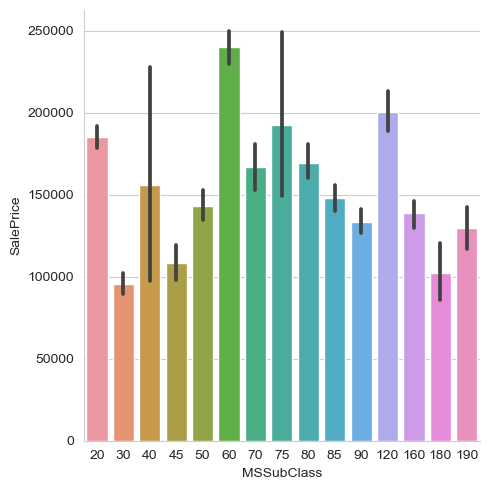

In [17]:
sns.catplot(df, x="MSSubClass", y="SalePrice", kind="bar")

In [18]:
get_score_with_linear_regression_and_one_hot_encoding("MSSubClass")

Linear: [37270.21011113 43757.99599358 43666.76483635 37098.10940079
 52152.12273019]
Tree: [40503.76719563 51642.62048796 49253.09227717 38637.04219727
 48256.25509426]


(42789.04061440753, 45658.55545045612)

### BldgType ✔

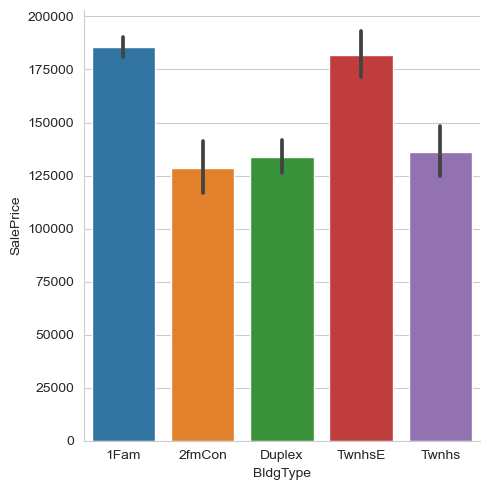

In [19]:
sns.catplot(df, x="BldgType", y="SalePrice", kind="bar")

In [20]:
get_score_with_linear_regression_and_one_hot_encoding("BldgType")

Linear: [39222.78302233 45881.45061081 46366.04245918 39325.93184761
 53150.27133617]
Tree: [41277.30520865 56043.41644305 54303.00102412 40932.33476669
 52441.62016236]


(44789.2958552194, 48999.5355209743)

### Neighborhood ✔

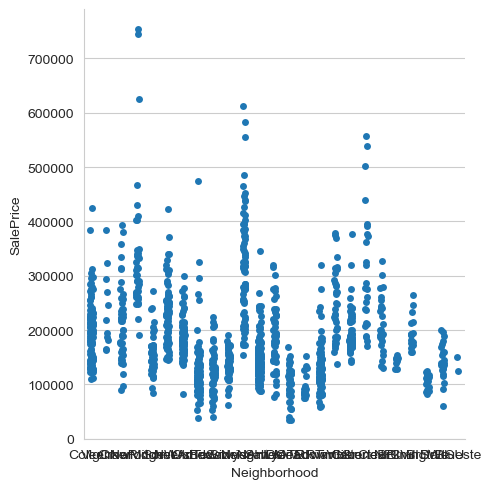

In [21]:
sns.catplot(df, x="Neighborhood", y="SalePrice")

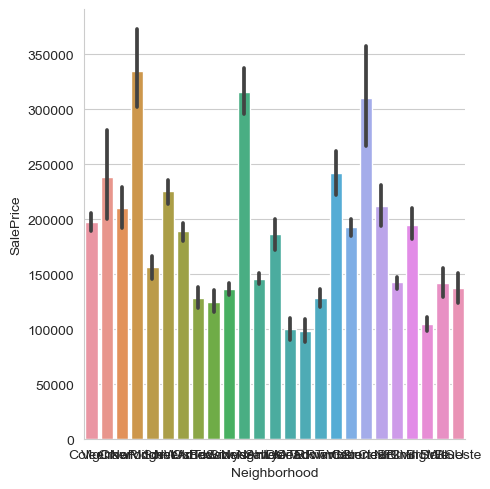

In [22]:
sns.catplot(df, x="Neighborhood", y="SalePrice", kind="bar")

In [23]:
get_score_with_linear_regression_and_one_hot_encoding("Neighborhood")

Linear: [32879.61101851 39812.55109971 42167.00067527 35838.58030857
 47709.55925007]
Tree: [40906.92521055 57926.55073896 45893.99740375 39794.96644949
 51793.455787  ]


(39681.46047042427, 47263.17911794882)

### OverallQual ✔

In [24]:
df["OverallQual"].describe()

count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64

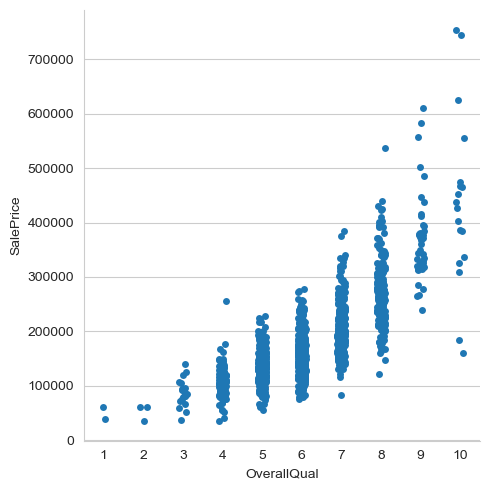

In [25]:
sns.catplot(df, x="OverallQual", y="SalePrice")

In [26]:
get_score(features="OverallQual")

Linear: [33704.05417834 40045.70166356 42739.14071826 35817.04216727
 47360.70867338]
Tree: [40681.26425048 40573.74760726 42027.70434569 35262.7787364
 50429.87793129]


(39933.3294801633, 41795.07457422109)

In [27]:
get_score_with_linear_regression_and_one_hot_encoding("OverallQual")

Linear: [29603.5752118  37881.11754985 37998.82177103 30993.27032807
 44817.34327131]
Tree: [47333.55992675 51231.72786678 38022.48211468 36570.50235501
 53945.33398475]


(36258.82562641216, 45420.721249593444)

### OverallCond ✔

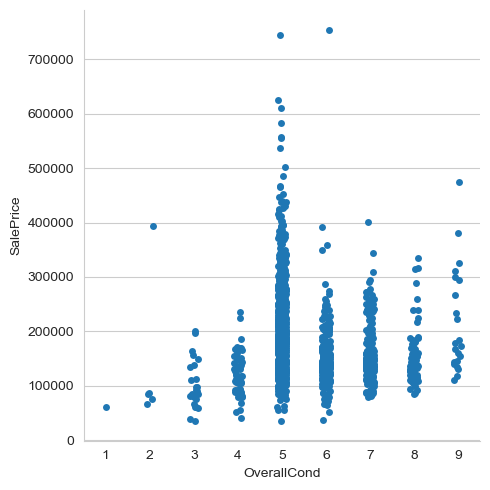

In [28]:
sns.catplot(df, x="OverallCond", y="SalePrice")

In [29]:
get_score(features="OverallCond")

Linear: [39172.14008367 45757.47551971 46287.58872775 40044.20873802
 53871.01674729]
Tree: [43230.12286767 54268.73873427 42511.76411256 39693.36692176
 47945.82270015]


(45026.485963289066, 45529.963067282646)

In [30]:
get_score_with_linear_regression_and_one_hot_encoding("OverallCond")

Linear: [39412.28287844 45496.80707982 46841.43438647 39824.62582709
 54025.10504331]
Tree: [41335.97592126 52287.12618997 53224.95977495 40416.07808184
 51289.71554949]


(45120.05104302722, 47710.771103499064)

### ExterQual ✔

In [31]:
df["ExterQual"].describe()

count     1460
unique       4
top         TA
freq       906
Name: ExterQual, dtype: object

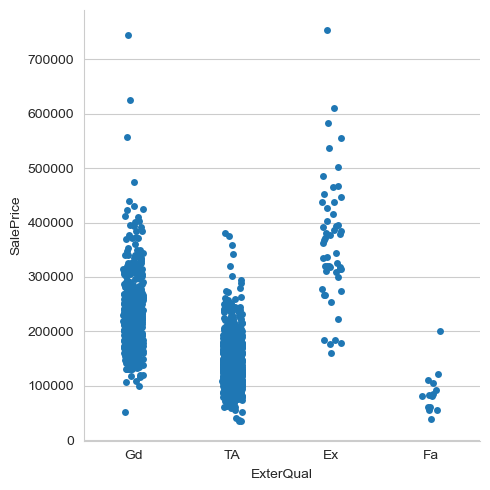

In [32]:
sns.catplot(df, x="ExterQual", y="SalePrice")

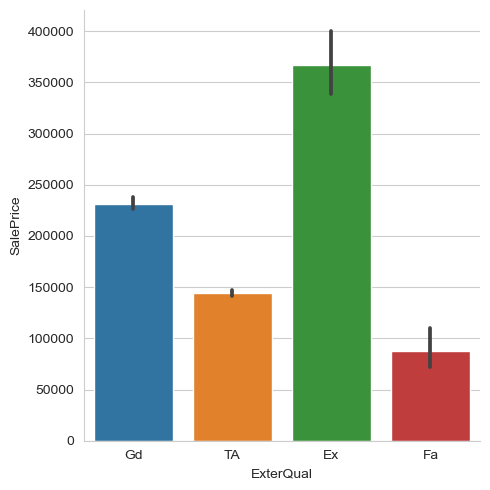

In [33]:
sns.catplot(df, x="ExterQual", y="SalePrice", kind="bar")

In [34]:
X = df.copy()
X["ExterQual_ordinal"] = X["ExterQual"].replace({"Ex": 4, "Gd": 3, "TA": 2, "Fa": 1, "Po": 0})
get_score(X, features="ExterQual_ordinal")

Linear: [36872.29712908 43585.50735855 42235.29943989 37556.90950018
 50590.42590412]
Tree: [45694.44308985 55877.98563811 51634.16097099 43908.1459977
 49555.76670188]


(42168.087866361966, 49334.1004797045)

In [35]:
get_score_with_linear_regression_and_one_hot_encoding("ExterQual")

Linear: [35642.26755738 43807.26888415 40195.55953451 36364.13384303
 50386.47825875]
Tree: [41789.82635672 55442.31673127 51749.21222473 42730.08061477
 46807.8668023 ]


(41279.14161556093, 47703.860545959906)

### ExterCond

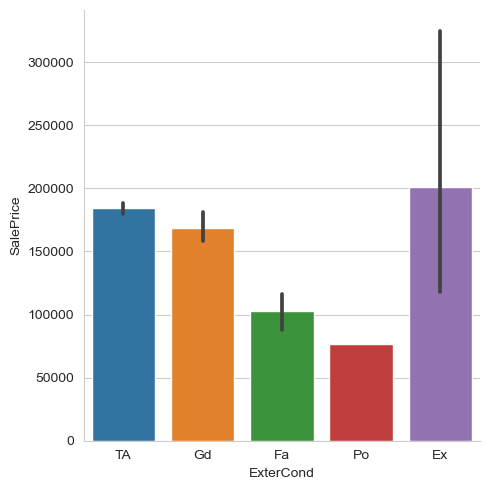

In [36]:
sns.catplot(df, x="ExterCond", y="SalePrice", kind="bar")

In [37]:
X = df.copy()
X["ExterCond"].replace({"Ex": 3, "Gd": 2, "TA": 1, "Fa": 1, "Po": -1}, inplace=True)
get_score(X, "ExterCond")

Linear: [40565.38870905 46661.65777156 47480.52849427 41592.78483842
 54668.25121376]
Tree: [43574.21791312 55091.95192843 51412.8115866  42654.11920733
 52699.99632532]


(46193.722205411395, 49086.61939215821)

In [38]:
get_score_with_linear_regression_and_one_hot_encoding("ExterCond")

Linear: [40611.60634509 46391.16553817 47420.31946229 41685.325359
 54718.47161193]
Tree: [42738.08900502 57830.60090895 46151.5066943  42513.55129085
 52491.22596343]


(46165.37766329702, 48344.99477250973)

### Foundation

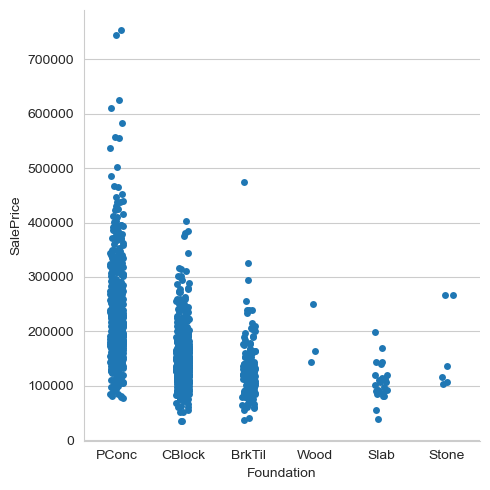

In [39]:
sns.catplot(df, x="Foundation", y="SalePrice")

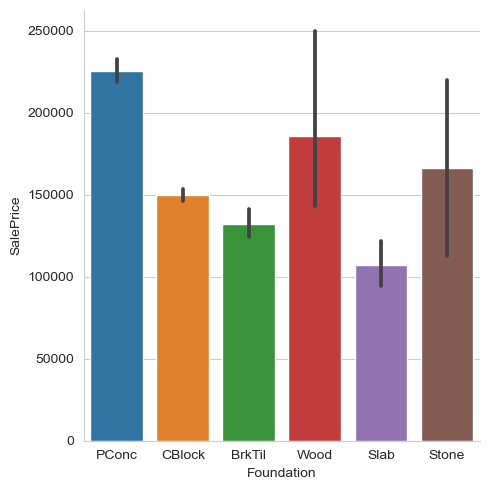

In [40]:
sns.catplot(df, x="Foundation", y="SalePrice", kind="bar")

In [41]:
get_score_with_linear_regression_and_one_hot_encoding("Foundation")

Linear: [40369.45160793 46535.48111477 46004.41119511 40435.59852122
 53941.25268518]
Tree: [44189.04152747 53287.20231354 52894.47264666 39607.74443627
 54110.08734341]


(45457.23902484293, 48817.70965347037)

### BsmtQual ✔

In [42]:
df["BsmtQual"].describe()

count     1423
unique       4
top         TA
freq       649
Name: BsmtQual, dtype: object

In [43]:
X = df.copy()
X["BsmtQual"].fillna("NA", inplace=True)

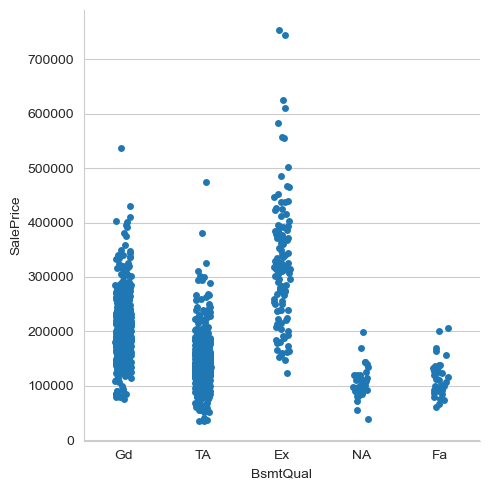

In [44]:
sns.catplot(X, x="BsmtQual", y="SalePrice")

In [45]:
X["BsmtQual_ordinal"] = X["BsmtQual"].replace({"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "NA": 0})
get_score(X, "BsmtQual_ordinal")

Linear: [38600.90834456 45085.88283072 45314.1309819  38633.39663069
 52625.14212091]
Tree: [43522.20787493 56991.59420828 44303.95398307 45181.82160915
 47658.29150136]


(44051.8921817557, 47531.57383535829)

In [46]:
get_score_with_linear_regression_and_one_hot_encoding("BsmtQual")

Linear: [35128.34855173 43468.4526477  42705.0373315  34568.30120996
 49847.47337407]
Tree: [43241.3178936  58665.31543956 44995.25715649 48407.97926376
 55287.86794494]


(41143.52262299383, 50119.547539670195)

### BsmtCond ✔

In [47]:
df["BsmtCond"].describe()

count     1423
unique       4
top         TA
freq      1311
Name: BsmtCond, dtype: object

In [48]:
X = df.copy()
X["BsmtCond"].fillna("NA", inplace=True)

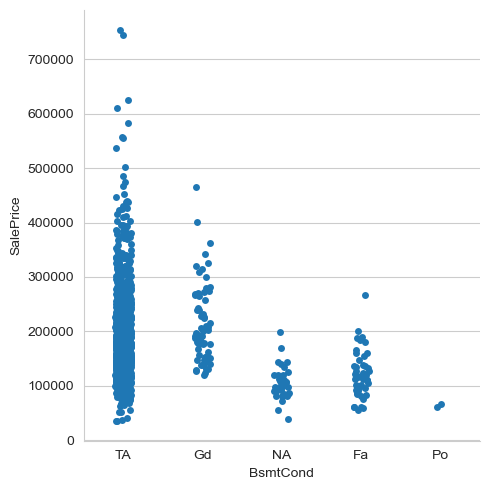

In [49]:
sns.catplot(X, x="BsmtCond", y="SalePrice")

In [50]:
X["BsmtCond_ordinal"] = X["BsmtCond"].replace({"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "NA": 0})
get_score(X, "BsmtCond_ordinal")

Linear: [40114.5826684  46982.6412728  46642.3113314  40951.96174541
 54320.33016913]
Tree: [43989.09721045 56917.04337897 46051.40189967 41429.77275665
 55028.83825267]


(45802.3654374274, 48683.2306996821)

In [51]:
get_score_with_linear_regression_and_one_hot_encoding("BsmtCond")

Linear: [40122.5332619  46979.46795163 46661.58436755 41101.30920915
 54370.09297186]
Tree: [44540.69308501 54842.69556553 44715.42275691 39812.65497495
 53159.99620563]


(45846.9975524179, 47414.29251760455)

### BsmtQual & BsmtCond

In [52]:
X = df.copy()
X["BsmtQual"].fillna("NA", inplace=True)
X["BsmtCond"].fillna("NA", inplace=True)
X["BsmtQual_ordinal"] = X["BsmtQual"].replace({"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "NA": 0})
X["BsmtCond_ordinal"] = X["BsmtCond"].replace({"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "NA": 0})
X["Bsmt"] = X["BsmtQual_ordinal"] + X["BsmtCond_ordinal"]

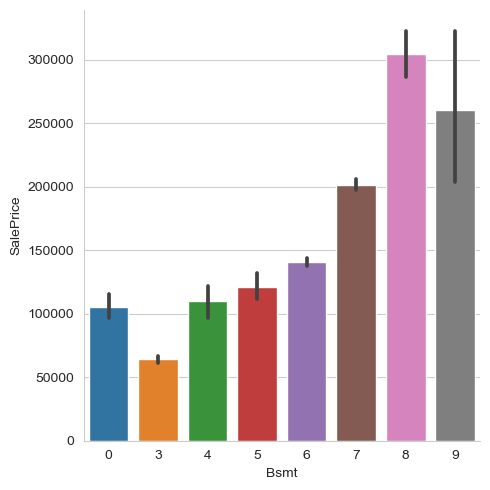

In [53]:
sns.catplot(X, x="Bsmt", y="SalePrice", kind="bar")

In [54]:
get_score(X, "Bsmt")

Linear: [39115.62079308 46046.37378204 45728.80314425 39570.54805056
 53230.78125851]
Tree: [44115.21643507 55309.56349193 46835.70630852 44902.78493426
 53371.56096569]


(44738.42540568783, 48906.96642709432)

In [55]:
X = df.copy()
X["BsmtQual"].fillna("NA", inplace=True)
X["BsmtCond"].fillna("NA", inplace=True)
X["BsmtQual_ordinal"] = X["BsmtQual"].replace({"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "NA": 0})
X["BsmtCond_ordinal"] = X["BsmtCond"].replace({"Ex": 1, "Gd": 2, "TA": 3, "Fa": 4, "Po": 5, "NA": 6})
X["Bsmt"] = X["BsmtQual_ordinal"] / X["BsmtCond_ordinal"]

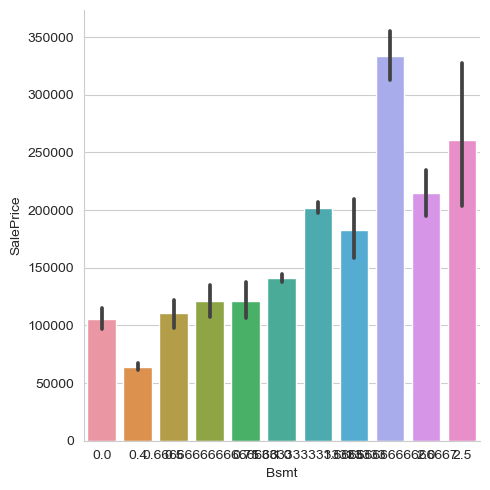

In [56]:
sns.catplot(X, x="Bsmt", y="SalePrice", kind="bar")

In [57]:
get_score(X, "Bsmt")

Linear: [38653.98081391 45607.92771605 45496.72895985 39775.67724169
 52605.17311932]
Tree: [42237.03782625 55780.2353136  44044.4431411  45328.95175083
 53847.80692517]


(44427.89757016355, 48247.69499138938)

### BsmtExposure ✔

In [58]:
df["BsmtExposure"].describe()

count     1422
unique       4
top         No
freq       953
Name: BsmtExposure, dtype: object

In [59]:
X = df.copy()
X["BsmtExposure"].fillna("NA", inplace=True)

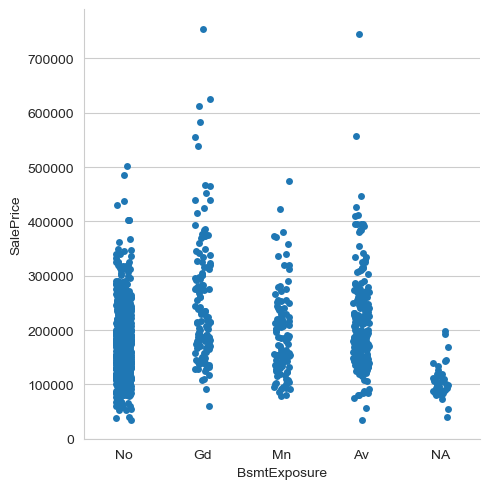

In [60]:
sns.catplot(X, x="BsmtExposure", y="SalePrice")

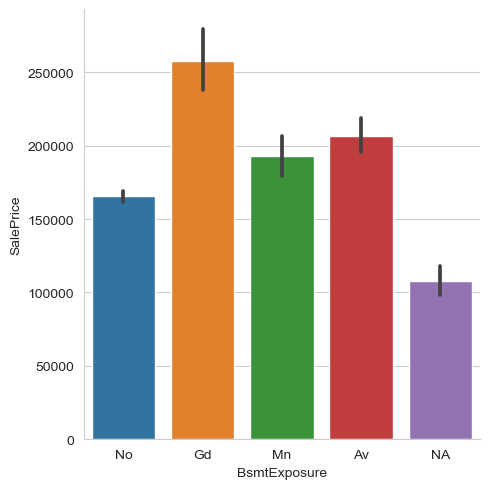

In [61]:
sns.catplot(X, x="BsmtExposure", y="SalePrice", kind="bar")

In [62]:
X["BsmtExposure_ordinal"] = X["BsmtExposure"].replace({"Gd": 4, "Av": 3, "Mn": 2, "No": 1, "NA": 0})
get_score(X, "BsmtExposure_ordinal")

Linear: [38814.87062875 45395.5620016  45043.9507495  39680.64815744
 52430.65277391]
Tree: [41925.184007   55790.87306185 41646.90984302 40933.05698307
 51902.62158333]


(44273.136862241736, 46439.72909565419)

In [63]:
get_score_with_linear_regression_and_one_hot_encoding("BsmtExposure")

Linear: [38675.23421035 45502.02252234 44742.91982047 39379.5238013
 52177.12479669]
Tree: [41658.55779832 54229.80422246 44543.32265085 40580.23975916
 54219.40004386]


(44095.365030228175, 47046.26489493005)

### TotalBsmtSF  ✔

In [64]:
df["TotalBsmtSF"].describe()

count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      6110.000000
Name: TotalBsmtSF, dtype: float64

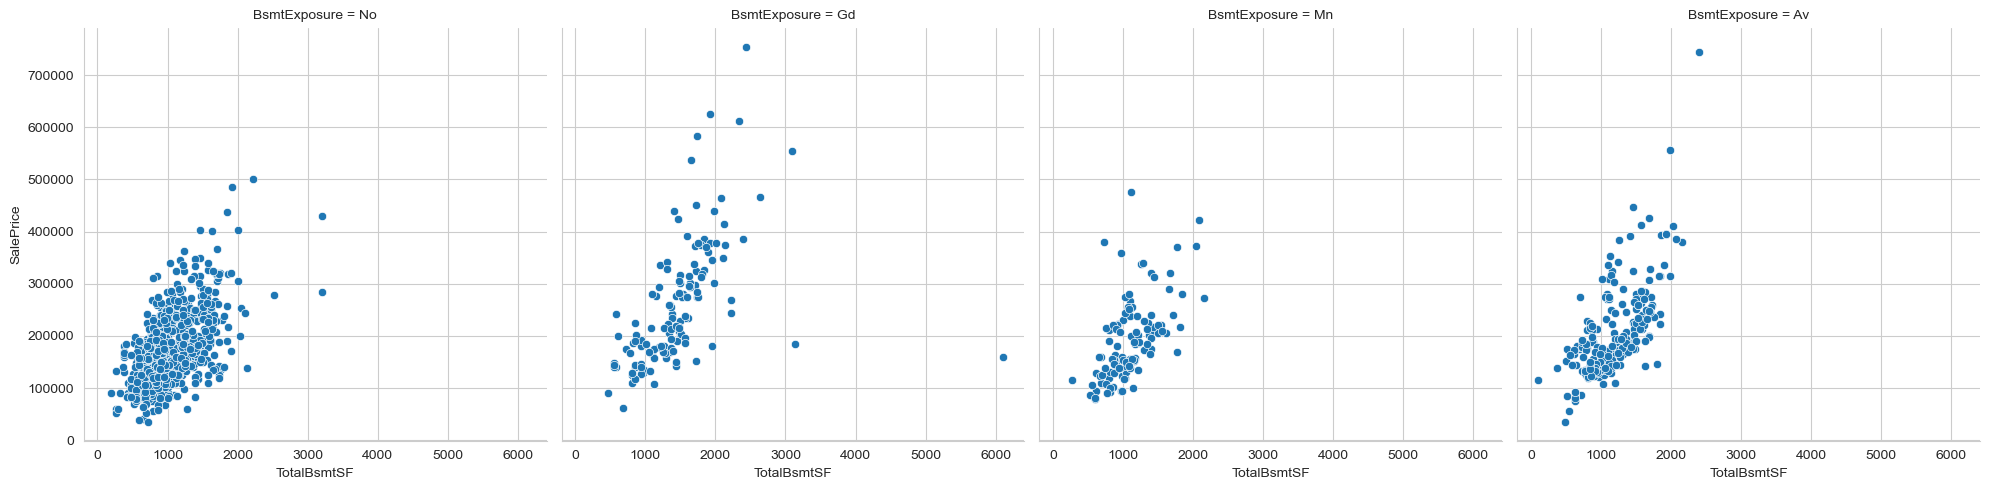

In [65]:
sns.relplot(df, x="TotalBsmtSF", y="SalePrice", col="BsmtExposure")

In [66]:
get_score(features="TotalBsmtSF")

Linear: [38027.50660639 43183.25446185 43548.98607082 37351.31685605
 57379.00080079]
Tree: [39161.40628382 54585.80370819 39855.24432998 41477.24038096
 46002.188646  ]


(43898.01295918168, 44216.37666979259)

### TotalBsmtSF & BsmtCond

In [67]:
X = df.copy()
X["BsmtCond"].fillna("NA", inplace=True)
X["BsmtCond_ordinal"] = X["BsmtCond"].replace({"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "NA": 0})

Score if using two features

In [68]:
get_score(X, features=["BsmtCond_ordinal", "TotalBsmtSF"])

Linear: [37973.41371123 43425.49660131 43567.29640181 37393.68373722
 57389.09892714]
Tree: [39978.9760354  53438.18751659 40413.18948164 39795.2220276
 43990.95152808]


(43949.797875744334, 43523.30531786157)

In [69]:
X["BsmtAreaCond"] = X["BsmtCond_ordinal"] * X["TotalBsmtSF"]
get_score(X, "BsmtAreaCond")

Linear: [37659.31292531 43049.54053704 43262.33098328 37569.53634264
 56704.726128  ]
Tree: [39339.97805764 48875.23518298 41865.35966652 39434.67855259
 49593.8979959 ]


(43649.089383255065, 43821.829891126676)

In [70]:
X["BsmtCond_ordinal"] = X["BsmtCond"].replace({"Ex": 1, "Gd": 2, "TA": 3, "Fa": 4, "Po": 5, "NA": 6})
X["BsmtAreaCond"] = X["TotalBsmtSF"] / X["BsmtCond_ordinal"]
get_score(X, "BsmtAreaCond")

Linear: [37793.42320424 43180.10906569 43420.07368317 37837.63840827
 56421.29203996]
Tree: [37930.35425922 53376.36502845 50268.84115553 40236.95473812
 46232.42984771]


(43730.507280266946, 45608.98900580574)

The score doesn't improve than using `TotalBsmtSF` alone.

### TotalBsmtSF & BsmtExposure

In [71]:
X = df.copy()
X["BsmtExposure"].fillna("NA", inplace=True)
X["BsmtExposure_ordinal"] = X["BsmtExposure"].replace({"Gd": 4, "Av": 3, "Mn": 2, "No": 1, "NA": 0})

In [72]:
X["BsmtAreaExposure"] = X["TotalBsmtSF"] * X["BsmtExposure_ordinal"]
get_score(X, "BsmtAreaExposure")

Linear: [37620.49033434 43370.48439186 42556.53333782 37471.50519678
 56937.81688167]
Tree: [41121.3340109  55449.52310938 38797.02599016 42599.38989896
 43853.05207014]


(43591.36602849422, 44364.06501590923)

In [73]:
X["BsmtExposure_ordinal"] = X["BsmtExposure"].replace({"Gd": 1, "Av": 2, "Mn": 3, "No": 4, "NA": 5})
X["BsmtAreaExposure"] = X["TotalBsmtSF"] / X["BsmtExposure_ordinal"]

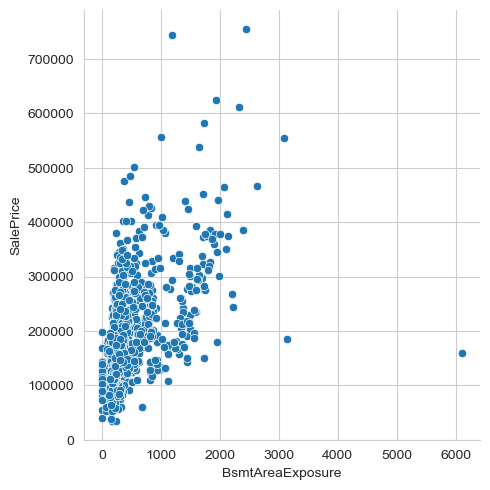

In [74]:
sns.relplot(X, x="BsmtAreaExposure", y="SalePrice")

In [75]:
get_score(X, "BsmtAreaExposure")

Linear: [37823.17241077 43599.42842193 42983.21572088 37800.14734363
 57902.98513762]
Tree: [42377.19197386 54200.92727818 44160.40519488 39513.63079438
 46639.44742919]


(44021.789806967114, 45378.320534098406)

The score doesn't improve than using `TotalBsmtSF` alone.

### BsmtFinType1

In [76]:
X = df.copy()
X["BsmtFinType1"].fillna("NA", inplace=True)

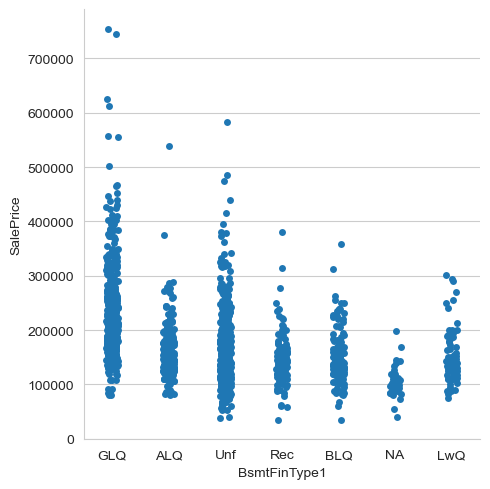

In [77]:
sns.catplot(X, x="BsmtFinType1", y="SalePrice")

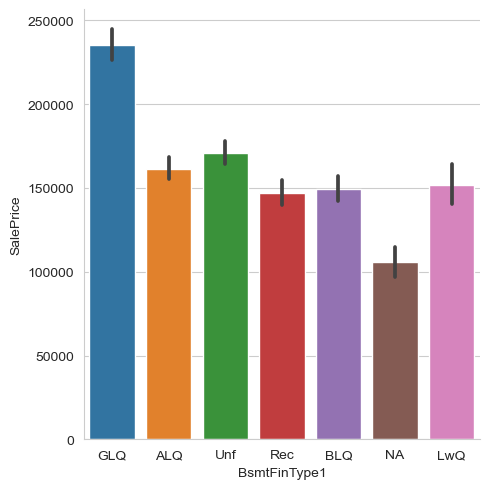

In [78]:
sns.catplot(X, x="BsmtFinType1", y="SalePrice", kind="bar")

In [79]:
get_score_with_linear_regression_and_one_hot_encoding("BsmtFinType1")

Linear: [40092.69394477 45516.64433355 45872.67034811 39125.75723508
 52658.49857548]
Tree: [44582.69005697 51733.90430343 48680.64484337 40386.67389178
 50658.42395448]


(44653.25288739862, 47208.467410004545)

### Heating

In [80]:
X = df.copy()
X["Heating"].fillna("NA", inplace=True)

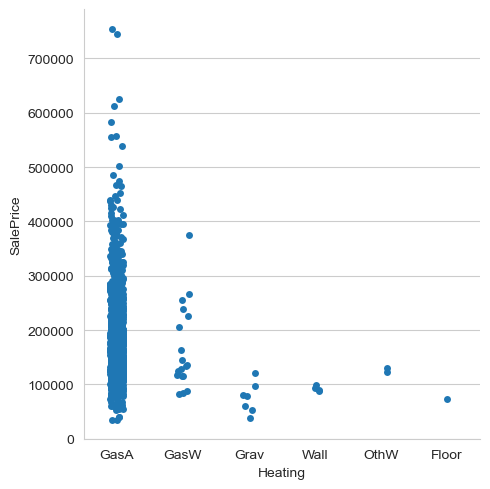

In [81]:
sns.catplot(X, x="Heating", y="SalePrice")

In [82]:
get_score_with_linear_regression_and_one_hot_encoding("Heating")

Linear: [40669.3914343  46815.15686029 47174.97790821 41909.85604039
 54787.33139937]
Tree: [43464.26227035 54582.08911377 51315.12363019 41991.88388036
 54229.04980718]


(46271.342728510885, 49116.48174037068)

### CentralAir

In [83]:
df["CentralAir"].describe()

count     1460
unique       2
top          Y
freq      1365
Name: CentralAir, dtype: object

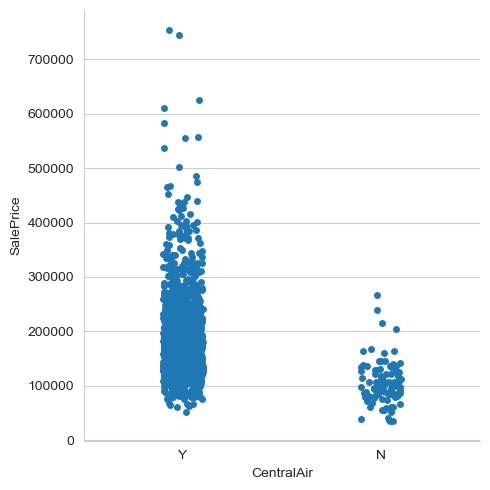

In [84]:
sns.catplot(df, x="CentralAir", y="SalePrice")

In [85]:
X = df.copy()
X["CentralAir"].replace({"Y": 1, "N": 0}, inplace=True)
get_score(X, "CentralAir")

Linear: [40569.27339695 46798.66612525 47159.11895632 41742.90397109
 54679.38593594]
Tree: [42734.23506494 53692.48223305 45665.73134763 41442.32342782
 54366.11114749]


(46189.86967711072, 47580.17664418464)

In [86]:
get_score_with_linear_regression_and_one_hot_encoding("CentralAir")

Linear: [40569.27339695 46798.66612525 47159.11895632 41742.90397109
 54679.38593594]
Tree: [42821.04210389 59767.55970456 52703.56115314 40435.40480981
 55147.57236348]


(46189.86967711073, 50175.02802697617)

### Electrical

In [87]:
df["Electrical"].describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

In [88]:
X = df.copy()
X["Electrical"].fillna("SBrkr", inplace=True)

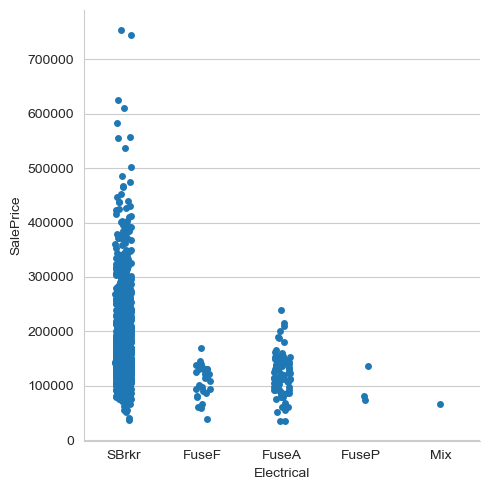

In [89]:
sns.catplot(X, x="Electrical", y="SalePrice")

In [90]:
get_score_with_linear_regression_and_one_hot_encoding("Electrical")

Linear: [40757.19902902 46851.56233476 47166.25502461 41857.69458709
 54801.49649247]
Tree: [44111.56835362 58524.72401277 54349.03793058 41163.87718665
 55160.92118405]


(46286.841493592336, 50662.02573353461)

### KitchenQual ✔

In [91]:
df["KitchenQual"].describe()

count     1460
unique       4
top         TA
freq       735
Name: KitchenQual, dtype: object

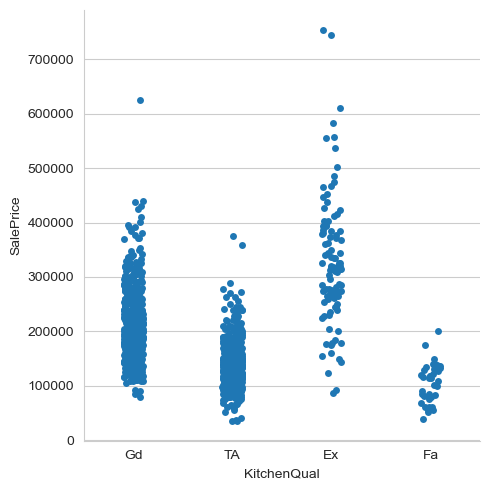

In [92]:
sns.catplot(df, x="KitchenQual", y="SalePrice")

In [93]:
X = df.copy()
X["KitchenQual_ordinal"] = X["KitchenQual"].replace({"Ex": 4, "Gd": 3, "TA": 2, "Fa": 1, "Po": 0})
get_score(X, "KitchenQual_ordinal")

Linear: [36549.06845067 42585.78592012 43530.17784263 37624.31561116
 50580.7564153 ]
Tree: [40271.60192029 58620.1576942  44407.76552293 44811.55287519
 47725.05303312]


(42174.020847974105, 47167.22620914343)

In [94]:
get_score_with_linear_regression_and_one_hot_encoding("KitchenQual")

Linear: [34519.57354651 41960.14997411 41774.94570891 35323.52280571
 49595.60137252]
Tree: [39874.68520114 53398.83312267 47030.82298341 43900.02730227
 49090.32476738]


(40634.758681551335, 46658.938675376296)

### Functional

In [95]:
df["Functional"].describe()

count     1460
unique       7
top        Typ
freq      1360
Name: Functional, dtype: object

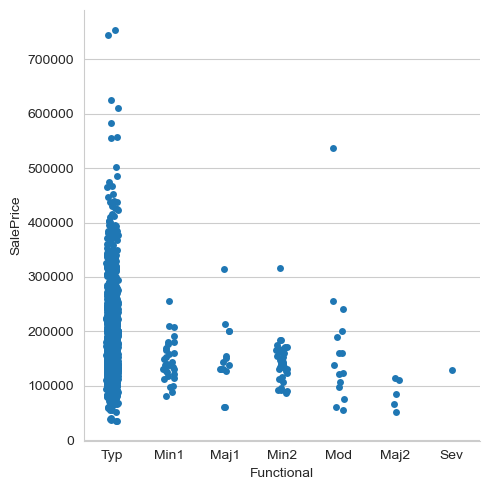

In [96]:
sns.catplot(df, x="Functional", y="SalePrice")

In [97]:
X = df.copy()
X["Functional_ordinal"] = X["Functional"].replace({
    "Typ": 0,
    "Min1": -1,
    "Min2": -2,
    "Mod": -3,
    "Maj1": -4,
    "Maj2": -5,
    "Sev": -6,
    "Sal": -7
})

In [98]:
get_score(X, "Functional_ordinal")

Linear: [40114.66827199 46494.37019818 46473.49766365 41515.22084508
 54065.11961204]
Tree: [43160.64889853 56212.21733846 45772.13007571 41415.98002517
 50641.08515232]


(45732.57531818921, 47440.412298037685)

In [99]:
get_score_with_linear_regression_and_one_hot_encoding("Functional")

Linear: [40040.70206471 46544.99327113 46654.22148363 41434.82122836
 54022.30717771]
Tree: [44223.81407646 54279.77670458 46724.64710741 41379.68338734
 49649.54523354]


(45739.409045108216, 47251.493301864786)

### Fireplaces

In [100]:
df["Fireplaces"].describe()

count    1460.000000
mean        0.613014
std         0.644666
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Fireplaces, dtype: float64

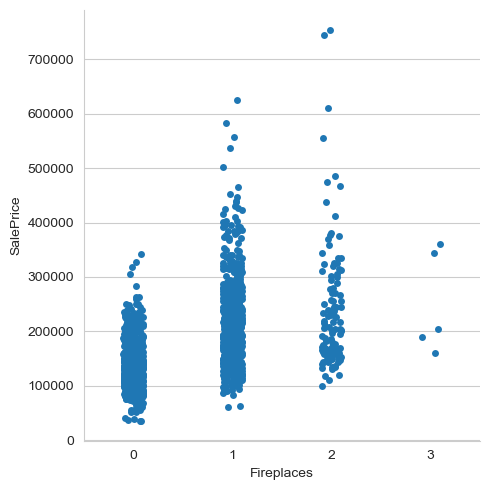

In [101]:
sns.catplot(df, x="Fireplaces", y="SalePrice")

In [102]:
get_score(features="Fireplaces")

Linear: [39978.23322996 45496.97251359 47041.21816529 40874.50814532
 53382.3328073 ]
Tree: [41939.33946324 52372.89058579 51086.01501007 42695.44315548
 51197.73333251]


(45354.65297229161, 47858.28430942138)

### FireplaceQu ✔

In [103]:
df["FireplaceQu"].describe()

count     770
unique      5
top        Gd
freq      380
Name: FireplaceQu, dtype: object

In [104]:
X = df.copy()
X["FireplaceQu"].fillna("NA", inplace=True)

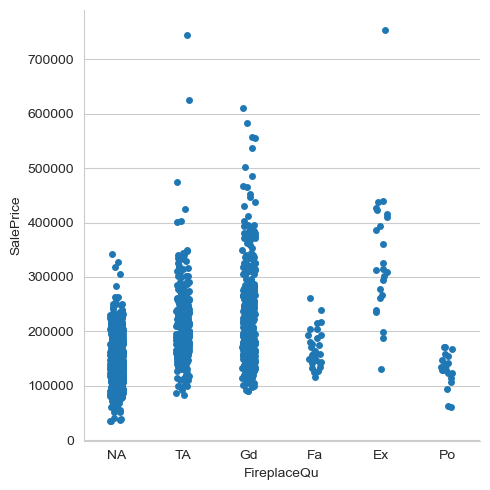

In [105]:
sns.catplot(X, x="FireplaceQu", y="SalePrice")

In [106]:
get_score_with_linear_regression_and_one_hot_encoding("FireplaceQu")

Linear: [39096.19910091 43200.23086749 43989.72312252 40298.00671948
 53071.87897195]
Tree: [42340.0789018  52447.50768916 44382.74577129 43348.67176833
 54881.63333615]


(43931.20775647022, 47480.12749334778)

In [107]:
X["FireplaceQu_ordinal"] = X["FireplaceQu"].replace({
    "NA": 0,
    "Po": 1,
    "Fa": 2,
    "TA": 3,
    "Gd": 4,
    "Ex": 5,
})
get_score(X, "FireplaceQu_ordinal")

Linear: [39358.57081829 44969.556896   46058.04126067 40939.06133153
 52653.1061326 ]
Tree: [42680.20537453 54873.98579882 42544.7356949  42790.95974303
 56021.33553749]


(44795.66728781598, 47782.24442975289)

### GarageYrBlt

In [108]:
df["GarageYrBlt"].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [109]:
X = df.copy()
X["GarageYrBlt"].fillna(0, inplace=True)

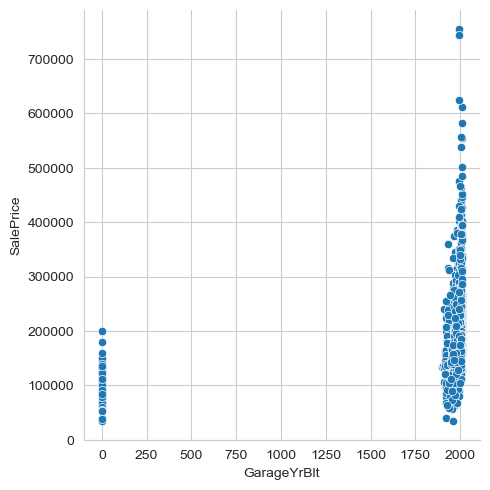

In [110]:
sns.relplot(X, x="GarageYrBlt", y="SalePrice")

In [111]:
get_score(X, "GarageYrBlt")

Linear: [40390.94023212 46753.86336722 47302.64107578 41868.5293211
 54480.97745078]
Tree: [43858.29762803 63906.4668369  45505.10922955 41654.57839872
 55739.67488462]


(46159.39028940089, 50132.82539556337)

### GarageArea

In [112]:
df["GarageArea"].describe()

count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64

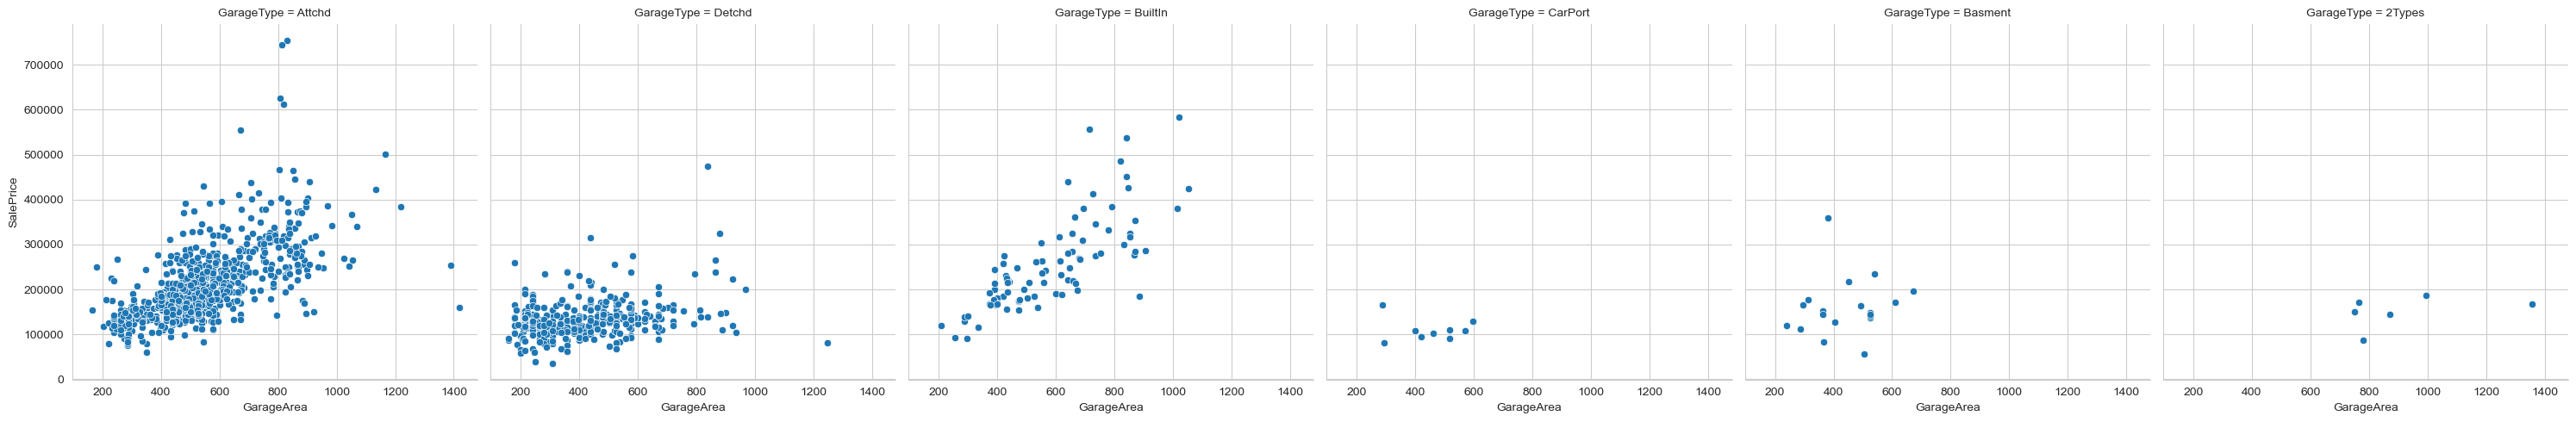

In [113]:
sns.relplot(df, x="GarageArea", y="SalePrice", col="GarageType")

In [114]:
get_score(features="GarageArea")

Linear: [36916.64501976 44406.49159118 45728.95531673 40464.49775169
 54016.21994679]
Tree: [47449.29030728 61831.76227455 44495.87793788 42740.31905073
 64009.87419441]


(44306.56192522971, 52105.42475296717)

### PoolArea

In [115]:
df["PoolArea"].describe()

count    1460.000000
mean        2.758904
std        40.177307
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       738.000000
Name: PoolArea, dtype: float64

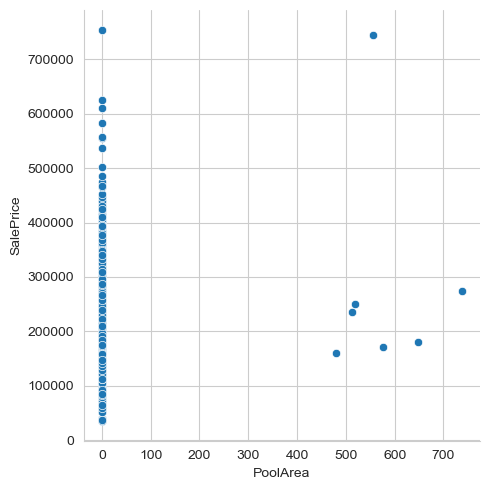

In [116]:
sns.relplot(df, x="PoolArea", y="SalePrice")

### Fence

In [117]:
df["Fence"].describe()

count       281
unique        4
top       MnPrv
freq        157
Name: Fence, dtype: object

In [118]:
X = df.copy()
X["Fence"].fillna("NA", inplace=True)

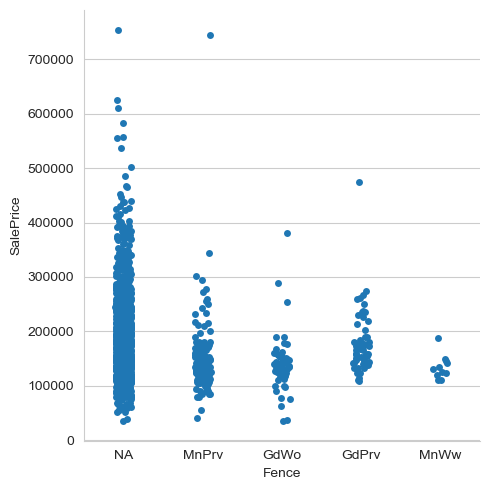

In [119]:
sns.catplot(X, x="Fence", y="SalePrice")

In [120]:
get_score_with_linear_regression_and_one_hot_encoding(feature="Fence", df=X)

Linear: [40791.52721305 46878.19743256 47227.71414019 42102.74559504
 54826.68105675]
Tree: [42259.53124092 59873.0552846  53922.01362772 40290.46667093
 54165.54109894]


(46365.37308751672, 50102.1215846225)

## Feature Selection

In [121]:
# To be encoded as one-hot
one_hot_cols = ["BldgType", "Neighborhood"]
ordinal_cols = ["OverallQual", "OverallCond", "ExterQual", "BsmtQual", "BsmtCond", "BsmtExposure", "KitchenQual",
                "FireplaceQu"]
numerical_cols = ["TotalBsmtSF"]

### baseline + one-hot columns

In [122]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

num_pipeline = StandardScaler()
cat_pipeline = OneHotEncoder()

X = df[baseline_features + one_hot_cols].copy()
y = df["SalePrice"]

preprocessing = ColumnTransformer([
    ("num", num_pipeline, baseline_features),
    ("cat", cat_pipeline, one_hot_cols)
])

X = preprocessing.fit_transform(X)

linear_model = LinearRegression()
scores = (-1 * cross_val_score(linear_model, X, y, cv=5, scoring="neg_root_mean_squared_error"))

print("Scores: ", scores)
print(scores.mean())

Scores:  [31292.53631967 38436.11751433 40237.38387771 33054.18586362
 46411.68482578]
37886.38168022397


### baseline + ordinal columns

In [123]:
from sklearn.preprocessing import FunctionTransformer

X = df[baseline_features + ordinal_cols].copy()
y = df["SalePrice"]


def handle_ordinal_cols(df):
    X = df.copy()
    X["ExterQual"].replace({"Ex": 4, "Gd": 3, "TA": 2, "Fa": 1, "Po": 0}, inplace=True)
    X["BsmtQual"].fillna("NA", inplace=True)
    X["BsmtQual"].replace({"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "NA": 0}, inplace=True)
    X["BsmtCond"].fillna("NA", inplace=True)
    X["BsmtCond"].replace({"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "NA": 0}, inplace=True)
    X["BsmtExposure"].fillna("NA", inplace=True)
    X["BsmtExposure"].replace({"Gd": 4, "Av": 3, "Mn": 2, "No": 1, "NA": 0}, inplace=True)
    X["KitchenQual"].fillna(1, inplace=True)
    X["KitchenQual"].replace({"Ex": 4, "Gd": 3, "TA": 2, "Fa": 1, "Po": 0}, inplace=True)
    X["FireplaceQu"].fillna("NA", inplace=True)
    X["FireplaceQu"].replace({
        "NA": 0,
        "Po": 1,
        "Fa": 2,
        "TA": 3,
        "Gd": 4,
        "Ex": 5,
    }, inplace=True)
    return X


ordinal_pipeline = make_pipeline(FunctionTransformer(handle_ordinal_cols), StandardScaler())
X = ordinal_pipeline.fit_transform(X)

In [124]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

linear_model = make_pipeline(StandardScaler(), LinearRegression())
scores = -1 * cross_val_score(linear_model, X, y, cv=5, scoring="neg_root_mean_squared_error")

print("Scores: ", scores)
print(scores.mean())

Scores:  [29597.18297528 37030.73099068 38116.24111582 31743.70438727
 44072.11271214]
36111.99443623606


### baseline + numerical columns

In [125]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

X = df[baseline_features + numerical_cols].copy()
y = df["SalePrice"]

linear_model = make_pipeline(StandardScaler(), LinearRegression())
scores = -1 * cross_val_score(linear_model, X, y, cv=5, scoring="neg_root_mean_squared_error")

print("Scores: ", scores)
print(scores.mean())

Scores:  [38027.50660639 43183.25446185 43548.98607082 37351.31685605
 57379.00080079]
43898.01295918168


### baseline + one-hot + ordinal + numerical

In [126]:
from sklearn.impute import SimpleImputer

ordinal_pipeline = make_pipeline(FunctionTransformer(handle_ordinal_cols), StandardScaler())
num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())
cat_pipeline = OneHotEncoder()

X = df[baseline_features + one_hot_cols + ordinal_cols + numerical_cols].copy()
y = df["SalePrice"]

preprocessing = make_column_transformer(
    (ordinal_pipeline, ordinal_cols),
    (num_pipeline, baseline_features + numerical_cols),
    (cat_pipeline, one_hot_cols)
)

X = preprocessing.fit_transform(X)

linear_model = LinearRegression()
scores = (-1 * cross_val_score(linear_model, X, y, cv=5, scoring="neg_root_mean_squared_error"))

print("Scores: ", scores)
print(scores.mean())

Scores:  [25311.25661487 32112.90836012 33649.9995933  27713.5605934
 42795.20171226]
32316.585374789684


## Models

In [143]:
from sklearn.model_selection import train_test_split

X = df[baseline_features + one_hot_cols + ordinal_cols + numerical_cols].copy()
y = df["SalePrice"]

preprocessing = make_column_transformer(
    (ordinal_pipeline, ordinal_cols),
    (num_pipeline, baseline_features + numerical_cols),
    (cat_pipeline, one_hot_cols)
)

X = preprocessing.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=42)

### Multi layer perceptron

In [149]:
from tensorflow.python.keras.metrics import RootMeanSquaredError
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

model.compile(loss='mean_squared_error', optimizer='nadam', metrics=[RootMeanSquaredError()])

history = model.fit(X_train, y_train, epochs=1024,
                    validation_data=(X_val, y_val))

Epoch 1/1024
37/37 [==============================] - 1s 10ms/step - loss: 39009333248.0000 - root_mean_squared_error: 196571.2031 - val_loss: 35371085824.0000 - val_root_mean_squared_error: 197003.6719
Epoch 2/1024
37/37 [==============================] - 0s 7ms/step - loss: 38967357440.0000 - root_mean_squared_error: 195812.0312 - val_loss: 35268141056.0000 - val_root_mean_squared_error: 196729.2812
Epoch 3/1024
37/37 [==============================] - 0s 7ms/step - loss: 38686846976.0000 - root_mean_squared_error: 196947.9844 - val_loss: 34769747968.0000 - val_root_mean_squared_error: 196391.0469
Epoch 4/1024
37/37 [==============================] - 0s 7ms/step - loss: 37693607936.0000 - root_mean_squared_error: 196487.7344 - val_loss: 33322096640.0000 - val_root_mean_squared_error: 195572.8750
Epoch 5/1024
37/37 [==============================] - 0s 6ms/step - loss: 35245469696.0000 - root_mean_squared_error: 194975.3438 - val_loss: 30191890432.0000 - val_root_mean_squared_error: 1

In [147]:
from sklearn.metrics import mean_squared_error

def rmse(y_test, y_pred):
    return mean_squared_error(y_test, y_pred, squared=False)

In [150]:
y_pred = model.predict(X_test)
rmse(y_test, y_pred)

5/5 [==============================] - 0s 2ms/step


30624.911434699858

## Test Data

Train on the whole data

In [128]:
linear_model = LinearRegression()
linear_model.fit(X, y)

LinearRegression()

In [129]:
test_raw_df = pd.read_csv('test.csv')
test_df = test_raw_df[baseline_features + one_hot_cols + ordinal_cols + numerical_cols]

X_test = preprocessing.fit_transform(test_df)
y_pred = linear_model.predict(X_test)

In [130]:
submission_df = pd.concat([test_raw_df['Id'], pd.Series(y_pred, name='SalePrice')], axis=1)
submission_df.to_csv('submission.csv', index=False)

In [131]:
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f submission.csv -m "First submission"

Successfully submitted to House Prices - Advanced Regression Techniques



  0%|          | 0.00/35.1k [00:00<?, ?B/s]
 23%|##2       | 8.00k/35.1k [00:00<00:00, 59.3kB/s]
100%|##########| 35.1k/35.1k [00:02<00:00, 12.9kB/s]


In [170]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

model.compile(loss='mean_squared_error', optimizer='nadam', metrics=[RootMeanSquaredError()])

history = model.fit(X, y, epochs=1000,)

Epoch 1/1000
46/46 [==============================] - 1s 6ms/step - loss: 39037775872.0000 - root_mean_squared_error: 199199.3750
Epoch 2/1000
46/46 [==============================] - 0s 6ms/step - loss: 38986371072.0000 - root_mean_squared_error: 198006.7188
Epoch 3/1000
46/46 [==============================] - 0s 5ms/step - loss: 38569291776.0000 - root_mean_squared_error: 197362.4844
Epoch 4/1000
46/46 [==============================] - 0s 6ms/step - loss: 37066010624.0000 - root_mean_squared_error: 196706.7969
Epoch 5/1000
46/46 [==============================] - 0s 6ms/step - loss: 33532014592.0000 - root_mean_squared_error: 194898.0469
Epoch 6/1000
46/46 [==============================] - 0s 6ms/step - loss: 27329134592.0000 - root_mean_squared_error: 191326.2344
Epoch 7/1000
46/46 [==============================] - 0s 6ms/step - loss: 19106308096.0000 - root_mean_squared_error: 185968.9531
Epoch 8/1000
46/46 [==============================] - 0s 7ms/step - loss: 11128538112.0000

In [171]:
y_pred = np.reshape(y_pred, y_pred.shape[0])

In [172]:
submission_df = pd.concat([test_raw_df['Id'], pd.Series(y_pred, name='SalePrice')], axis=1)
submission_df.to_csv('submission.csv', index=False)

In [173]:
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f submission.csv -m "Using MLP"

Successfully submitted to House Prices - Advanced Regression Techniques



  0%|          | 0.00/22.6k [00:00<?, ?B/s]
 35%|###5      | 8.00k/22.6k [00:00<00:00, 67.1kB/s]
100%|##########| 22.6k/22.6k [00:01<00:00, 11.6kB/s]
